In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
data = pd.read_excel('2020_DD_NWM_OFDA_clinics.xlsx')

In [3]:
data.head()

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName
0,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1406221,0.0,NaN,1963-07-18 00:00:00,2020-01-02,60,10100,NWM,"PeriodicX, ProphyAd, FMP, OralHygIn",10HYMODEA
1,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1456438,0.0,NaN,1050043,2020-01-02,60,41200,NWM,"PrSclRtPl-LL, PrSclRtPl-UL, GingIrrQd-LL, Ging...",10HYIARIAS
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,21600,DD,BORGA,14HYHPATEL
3,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1181395,0.0,Late Cancellation,6306,2020-01-02,60,124820,NWM,"LimitedEx, CrwnPrCrS#30",10DRLHARBR
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,26900,DD,PALSIS NON INS $175,14HYMSANCH


In [4]:
data['LateFlag'].value_counts()

0.0    25234
1.0      957
Name: LateFlag, dtype: int64

# Data Generation

In [5]:
data

,ApptStartUTCDateTime,ApptEndUTCDateTime,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,BROKENREASON,PATID,APPTDATE,APPTLEN,AMOUNT,ClinicName,APPTREASON,ProviderName
0,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1406221,0.0,NaN,1963-07-18 00:00:00,2020-01-02,60,10100,NWM,"PeriodicX, ProphyAd, FMP, OralHygIn",10HYMODEA
1,2020-01-02 13:00:00,2020-01-02 14:00:00,7,0,1456438,0.0,NaN,1050043,2020-01-02,60,41200,NWM,"PrSclRtPl-LL, PrSclRtPl-UL, GingIrrQd-LL, Ging...",10HYIARIAS
2,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1536678,0.0,NaN,1815,2020-01-02,60,21600,DD,BORGA,14HYHPATEL
3,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1181395,0.0,Late Cancellation,6306,2020-01-02,60,124820,NWM,"LimitedEx, CrwnPrCrS#30",10DRLHARBR
4,2020-01-02 14:00:00,2020-01-02 15:00:00,8,0,1290336,0.0,No Show,17892,2020-01-02,60,26900,DD,PALSIS NON INS $175,14HYMSANCH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26308,2020-12-30 22:30:00,2020-12-30 23:00:00,16,30,1709975,0.0,NaN,1062748,2020-12-30,30,0,NWM,**DELRET,11DRPNAIRI
26309,2020-12-30 22:30:00,2020-12-30 23:00:00,16,30,1711037,0.0,NaN,1075049,2020-12-30,30,0,DD,FOLLOW UP,14DRJLUNDG
26310,2020-12-30 23:00:00,2020-12-31 00:00:00,17,0,1609755,0.0,NaN,16104,2020-12-30,60,12100,OFDA,"PeriodicX, ProphyAd, OralHygIn",03HYCMILTO
26311,2020-12-30 23:00:00,2020-12-31 00:00:00,17,0,1676718,0.0,NaN,1001072,2020-12-30,60,14700,OFDA,"PeriodicX, 4 BWX, PerMaint, OralHygIn",02HYAMADRI


In [6]:
data['AMOUNT'] = data['AMOUNT']/100

In [7]:
data['ratio'] = data['AMOUNT'] / data['APPTLEN']

In [8]:
data['category'] = data['AMOUNT']

In [9]:
for i in range (0, len(data)):
    if (data['category'].iloc[i] <= 100):
        data['category'].iloc[i] = 'water'
    elif(data['category'].iloc[i] >= 2000):
        data['category'].iloc[i] = 'rock'
    else :
        data['category'].iloc[i] = 'sand'

/var/folders/x9/c5k7wpkd63q09jb3j0lqsvv80000gn/T/ipykernel_7263/3237541663.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['category'].iloc[i] = 'sand'


In [10]:
data['Cancelled'] = data['BROKENREASON']
lst = ['Other','Medical Reason','Cannot leave work','Vacation/Out of town', '.',
       'Forgot','Cannot afford treatment','Choosing not to do treatment','Family event']
cancelled = data['Cancelled'].fillna(0)
cancelled = cancelled.replace('Cancellation',1).replace('Late Cancellation',2).replace('No Show',3).replace(lst,4)
data['Cancelled'] = cancelled

In [11]:
data['Cancelled'].value_counts()

0    24878
1      527
3      429
2      322
4      157
Name: Cancelled, dtype: int64

In [12]:
data_replaced = np.where((data['LateFlag'] ==1) & (data['Cancelled'] !=0) , 0, data['LateFlag'])

In [13]:
data_replaced = pd.DataFrame(data_replaced)

In [14]:
data['LateFlag'] = data_replaced

In [15]:
data['LateFlag'].value_counts()

0.0    25306
1.0      885
Name: LateFlag, dtype: int64

#### age

[21. 38. 32. ... 36. 43. 36.]


<AxesSubplot:ylabel='Count'>

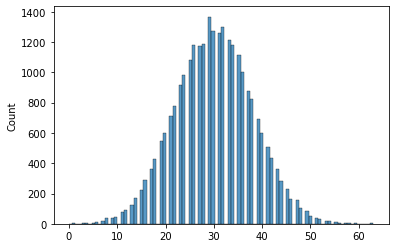

In [16]:
np.random.seed(123)
age = np.random.normal(loc = 30, scale = 8, size = 26313)
age = np.round_(age,decimals = 0)
print(age)
sns.histplot(age)

In [17]:
#add the age to the dataframe
data['Age'] = age

In [18]:
data['Age'].value_counts()

 29.0    1367
 32.0    1297
 30.0    1273
 31.0    1262
 33.0    1216
         ... 
 59.0       3
 63.0       2
 58.0       2
-0.0        1
 2.0        1
Name: Age, Length: 61, dtype: int64

#### Gender

<AxesSubplot:ylabel='Count'>

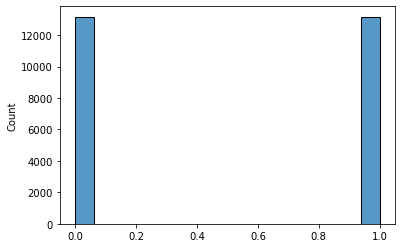

In [19]:
np.random.seed(123)
gender = []
for i in range(0,26313):
    n = random.randint(0,1)
    gender.append(n)
#print(gender)
sns.histplot(gender)

In [20]:
#add the gender to the dataframe 
#0 as female & 1 as male
data['Gender'] = gender

In [21]:
data['Gender'].value_counts()

0    13168
1    13145
Name: Gender, dtype: int64

#### Income

<AxesSubplot:ylabel='Count'>

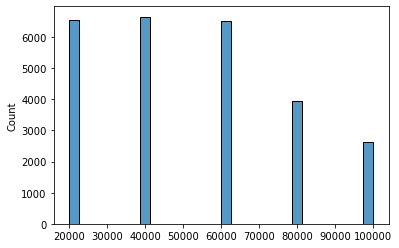

In [22]:
np.random.seed(123)
salary_range = [20000, 40000, 60000, 80000, 100000]
w = (25,25,25,15,10)
salary = random.choices(salary_range, weights = w, k = 26313)
sns.histplot(salary)

In [23]:
#add the salary to the dataframe 
data['Salary'] = salary

In [24]:
data['Salary'].value_counts()

40000     6657
20000     6555
60000     6519
80000     3938
100000    2644
Name: Salary, dtype: int64

#### physical distance from dental clinic

<AxesSubplot:ylabel='Count'>

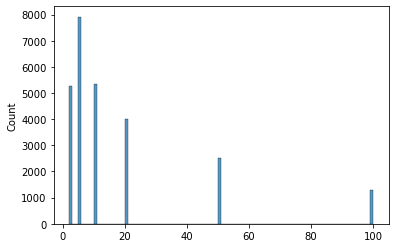

In [25]:
np.random.seed(123)
distance_range = [2,5,10,20,50,100]
w1 = (20,30,20,15,10,5)
distance = random.choices(distance_range, weights = w1, k = 26313)
sns.histplot(distance)

In [26]:
#add the distance to the dataframe 
data['Distance'] = distance

In [27]:
data['Distance'].value_counts()

5      7916
10     5334
2      5249
20     4005
50     2534
100    1275
Name: Distance, dtype: int64

#### frequency of dental cleaning

<AxesSubplot:ylabel='Count'>

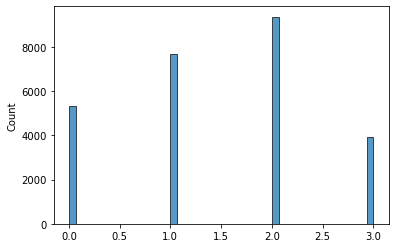

In [28]:
np.random.seed(123)
daily_cleaning_frequency_range = [0,1,2,3]
w2 = (20,30,35,15)
daily_cleaning_frequency = random.choices(daily_cleaning_frequency_range, weights = w2, k = 26313)
sns.histplot(daily_cleaning_frequency)

In [29]:
#add the daily cleaning frequency to the dataframe 
data['daily_cleaning_frequency'] = daily_cleaning_frequency

In [30]:
data['daily_cleaning_frequency'].value_counts()

2    9372
1    7683
0    5311
3    3947
Name: daily_cleaning_frequency, dtype: int64

#### dental insurance

<AxesSubplot:ylabel='Count'>

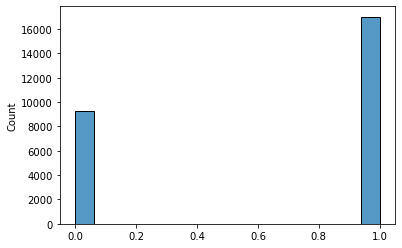

In [31]:
np.random.seed(123)
insurance_range = [0,1]
w3 = (35,65)
insurance = random.choices(insurance_range, weights = w3, k = 26313)
sns.histplot(insurance)

In [32]:
#add the insurance to the dataframe 
data['Insurance'] = insurance

In [33]:
data['Insurance'].value_counts()

1    17024
0     9289
Name: Insurance, dtype: int64

In [34]:
data.corr()

,TIME_HOUR,TIME_MINUTE,APPTID,LateFlag,APPTLEN,AMOUNT,ratio,Cancelled,Age,Gender,Salary,Distance,daily_cleaning_frequency,Insurance
TIME_HOUR,1.000000,0.021832,-0.010448,-0.009062,-0.056382,-0.033064,-0.012545,0.018739,-0.002611,-0.007790,0.002330,-0.001088,-0.001870,0.005925
TIME_MINUTE,0.021832,1.000000,0.080633,-0.029226,-0.222988,0.023540,0.070268,-0.013889,0.011345,-0.005676,0.000991,0.002820,0.016403,-0.002355
APPTID,-0.010448,0.080633,1.000000,0.019975,0.041146,0.087827,0.064562,-0.287302,-0.013998,-0.005188,0.011611,0.007904,0.001340,0.001439
LateFlag,-0.009062,-0.029226,0.019975,1.000000,0.044650,0.011547,0.005916,-0.040314,0.016932,-0.000090,-0.004569,0.003230,0.007438,0.001618
APPTLEN,-0.056382,-0.222988,0.041146,0.044650,1.000000,0.332489,0.067918,0.005004,-0.000967,0.006650,0.006392,0.000857,0.000120,-0.005481
AMOUNT,-0.033064,0.023540,0.087827,0.011547,0.332489,1.000000,0.804975,-0.005646,-0.000123,-0.002782,0.008041,0.000799,0.001104,-0.005741
ratio,-0.012545,0.070268,0.064562,0.005916,0.067918,0.804975,1.000000,-0.004991,-0.000307,0.002008,0.011093,0.004504,-0.001978,-0.002227
Cancelled,0.018739,-0.013889,-0.287302,-0.040314,0.005004,-0.005646,-0.004991,1.000000,-0.001098,-0.001066,-0.007331,-0.003283,-0.006007,0.005748
Age,-0.002611,0.011345,-0.013998,0.016932,-0.000967,-0.000123,-0.000307,-0.001098,1.000000,0.011230,0.008286,-0.004926,0.001330,0.001900
Gender,-0.007790,-0.005676,-0.005188,-0.000090,0.006650,-0.002782,0.002008,-0.001066,0.011230,1.000000,0.002071,0.002439,-0.006177,0.006273


<AxesSubplot:>

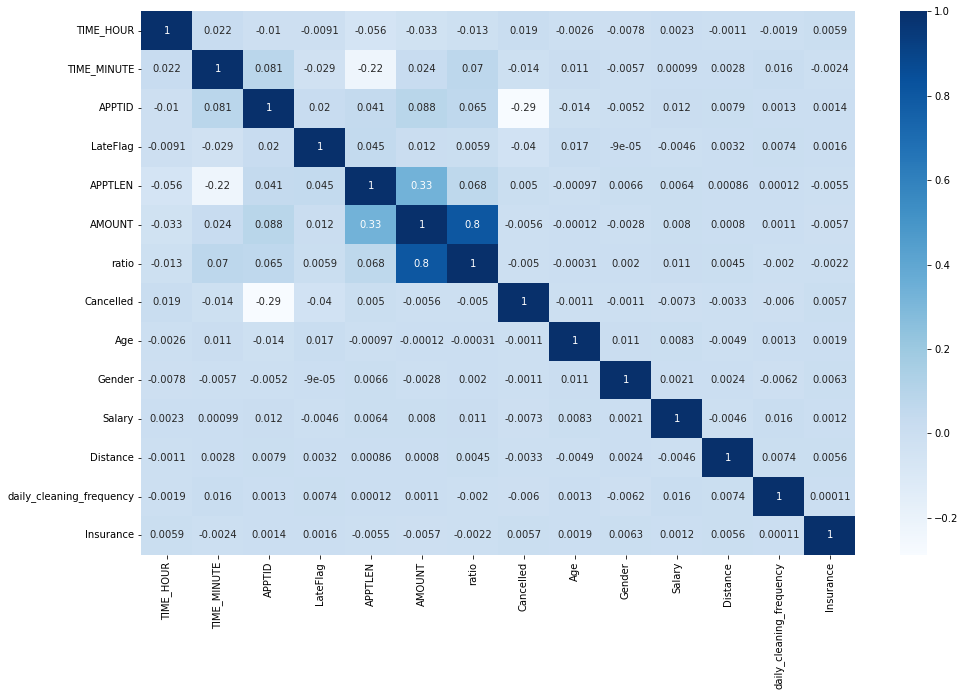

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),cbar=True,annot=True,cmap='Blues')

# Model Training and Testing

In [36]:
data_demo = data[["LateFlag", "Age", "Gender", "Salary", "Distance", "daily_cleaning_frequency", "Insurance"]]
data_demo['LateFlag'] = data_demo['LateFlag'].fillna(1)
data_demo

/var/folders/x9/c5k7wpkd63q09jb3j0lqsvv80000gn/T/ipykernel_7263/1243635773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_demo['LateFlag'] = data_demo['LateFlag'].fillna(1)


,LateFlag,Age,Gender,Salary,Distance,daily_cleaning_frequency,Insurance
0,0.0,21.0,0,20000,50,3,0
1,0.0,38.0,1,40000,5,1,1
2,0.0,32.0,1,40000,10,1,0
3,0.0,18.0,1,20000,5,3,0
4,0.0,25.0,1,60000,5,1,1
...,...,...,...,...,...,...,...
26308,0.0,30.0,0,80000,5,2,0
26309,0.0,55.0,0,40000,50,0,0
26310,0.0,36.0,1,60000,2,3,0
26311,0.0,43.0,0,100000,20,2,0


In [37]:
from sklearn.model_selection import train_test_split
X,y = data_demo.iloc[:,1:], data_demo['LateFlag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
y.value_counts()

0.0    25306
1.0     1007
Name: LateFlag, dtype: int64

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Logistic Regression

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      5061
         1.0       0.00      0.00      0.00       202

    accuracy                           0.96      5263
   macro avg       0.48      0.50      0.49      5263
weighted avg       0.92      0.96      0.94      5263

0.9617577197149644


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


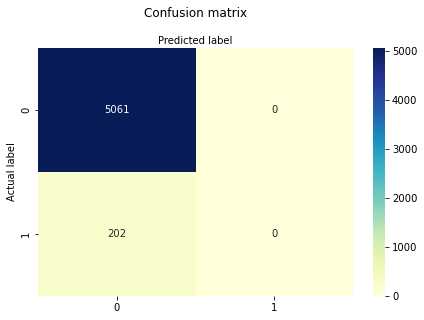

In [40]:
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
cf_matrix0 = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test, y_pred))
print(accuracy_score(LR.predict(X_train),y_train))

# KNN

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      5061
         1.0       0.00      0.00      0.00       202

    accuracy                           0.96      5263
   macro avg       0.48      0.50      0.49      5263
weighted avg       0.92      0.96      0.94      5263

0.961520190023753


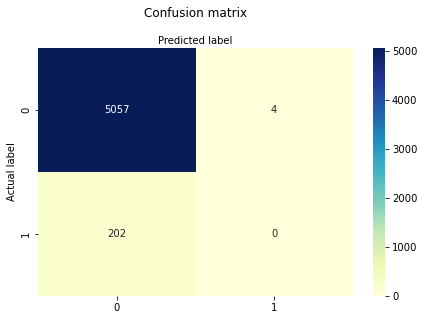

In [41]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cf_matrix0 = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test, y_pred))
print(accuracy_score(KNN.predict(X_train),y_train))

# Decision Tree

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      5061
         1.0       0.02      0.01      0.01       202

    accuracy                           0.94      5263
   macro avg       0.49      0.50      0.49      5263
weighted avg       0.93      0.94      0.93      5263

0.9712589073634205


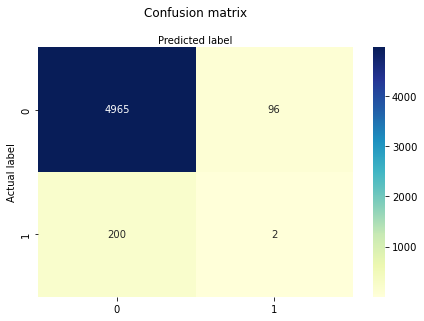

In [42]:
DCT = DecisionTreeClassifier()
DCT = DCT.fit(X_train, y_train)
y_pred = DCT.predict(X_test)
cf_matrix0 = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test, y_pred))
print(accuracy_score(DCT.predict(X_train),y_train))

# Random Forest

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      5061
         1.0       0.02      0.00      0.01       202

    accuracy                           0.95      5263
   macro avg       0.49      0.50      0.49      5263
weighted avg       0.93      0.95      0.94      5263

0.9712589073634205


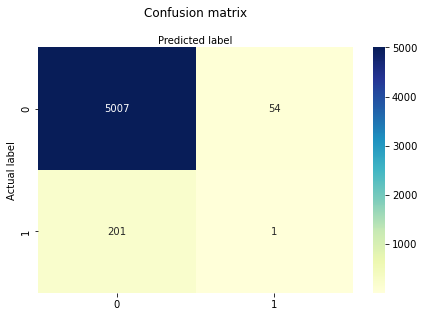

In [43]:
RDF = RandomForestClassifier()
RDF = RDF.fit(X_train, y_train)
y_pred = RDF.predict(X_test)
cf_matrix0 = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test, y_pred))
print(accuracy_score(RDF.predict(X_train),y_train))

# Naive Bayes

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      5061
         1.0       0.00      0.00      0.00       202

    accuracy                           0.96      5263
   macro avg       0.48      0.50      0.49      5263
weighted avg       0.92      0.96      0.94      5263

0.9617577197149644


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


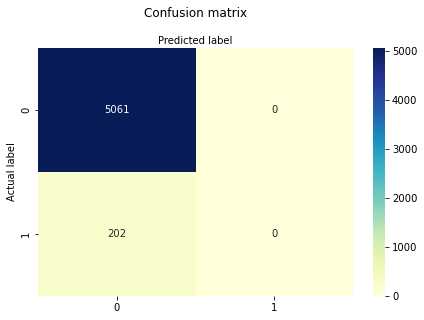

In [44]:
GNB = GaussianNB()
GNB = GNB.fit(X_train, y_train)
y_pred = GNB.predict(X_test)
cf_matrix0 = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test, y_pred))
print(accuracy_score(GNB.predict(X_train),y_train))

# Gradient Boosting

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      5061
         1.0       0.00      0.00      0.00       202

    accuracy                           0.96      5263
   macro avg       0.48      0.50      0.49      5263
weighted avg       0.92      0.96      0.94      5263

0.9618052256532067


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


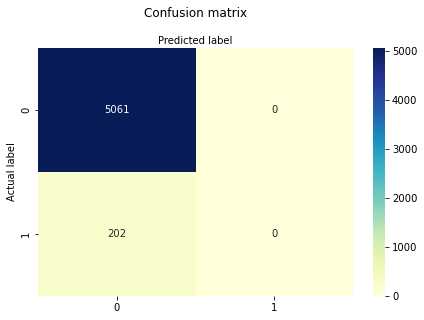

In [45]:
GB = GradientBoostingClassifier()
GB = GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
cf_matrix0 = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test, y_pred))
print(accuracy_score(GB.predict(X_train),y_train))

# ROC

In [46]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_knn = KNeighborsClassifier().fit(X_train, y_train)
probs_knn = model_knn.predict_proba(X_test)[:, 1]

model_nb = GaussianNB().fit(X_train, y_train)
probs_nb = model_nb.predict_proba(X_test)[:, 1]

model_gb = GradientBoostingClassifier().fit(X_train, y_train)
probs_gb = model_gb.predict_proba(X_test)[:, 1]

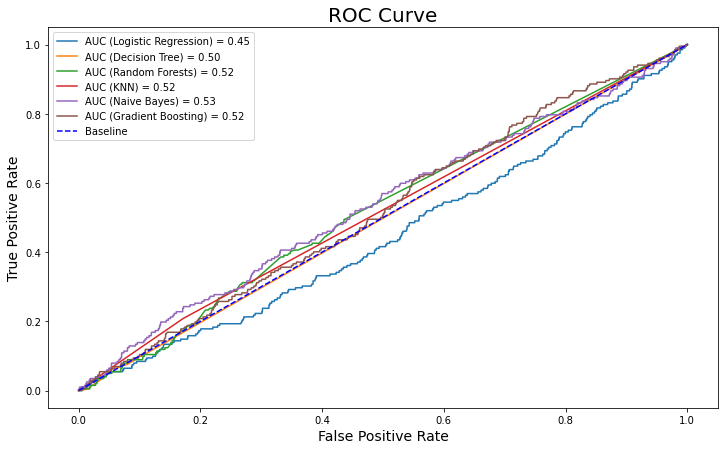

In [47]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_knn = roc_auc_score(y_test, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)

auc_nb = roc_auc_score(y_test, probs_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, probs_nb)

auc_gb = roc_auc_score(y_test, probs_gb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, probs_gb)



plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes) = {auc_nb:.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

# SMOTE

In [48]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)

In [49]:
y_sm.value_counts()

0.0    25306
1.0    25306
Name: LateFlag, dtype: int64

In [50]:
from imblearn.over_sampling import SMOTENC

oversample = SMOTENC(categorical_features=[1,2,3,4,5]
               , random_state=123, sampling_strategy = {1:8000})
X_sm_nc, y_sm_nc = oversample.fit_resample(X, y)

In [51]:
y_sm_nc.value_counts()

0.0    25306
1.0     8000
Name: LateFlag, dtype: int64

In [52]:
X_sm_nc.value_counts()

Age        Gender  Salary  Distance  daily_cleaning_frequency  Insurance
30.000000  0       20000   20        1                         1            39
           1       20000   5         2                         1            33
                   60000   5         1                         1            32
28.000000  1       60000   20        0                         1            31
26.000000  0       60000   5         1                         1            27
                                                                            ..
27.774699  0       100000  20        2                         1             1
27.776707  1       60000   5         2                         1             1
27.783757  0       40000   20        2                         1             1
27.792950  1       60000   2         2                         0             1
63.000000  0       80000   50        2                         1             1
Length: 15693, dtype: int64

In [53]:
X_train_sm_nc, X_test_sm_nc, y_train_sm_nc, y_test_sm_nc = train_test_split(X_sm_nc, y_sm_nc, test_size=0.2, random_state=42)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


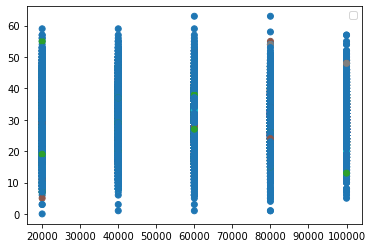

In [167]:
#BEFORE SMOTE PLOT
plt.scatter(X_train['Salary'], X_train['Age'], c = y_train,  cmap="tab10")  #  #  , label=str(label))
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


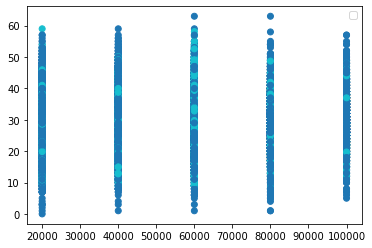

In [168]:
#AFTER SMOTE PLOT
plt.scatter(X_train_sm_nc['Salary'], X_train_sm_nc['Age'], c = y_train_sm_nc,  cmap="tab10")  #  #  , label=str(label))
plt.legend()
plt.show()

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      5067
         1.0       0.00      0.00      0.00      1595

    accuracy                           0.76      6662
   macro avg       0.38      0.50      0.43      6662
weighted avg       0.58      0.76      0.66      6662

0.7596081669419006


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


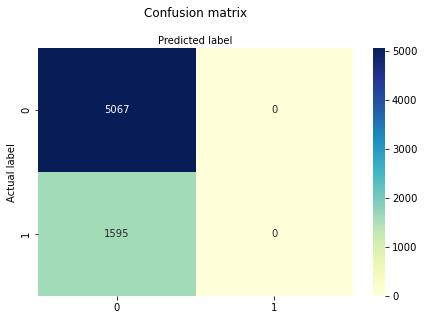

In [54]:
LR = LogisticRegression()
LR = LR.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = LR.predict(X_test_sm_nc)
cf_matrix0 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc, y_pred_sm_nc))
print(accuracy_score(LR.predict(X_train_sm_nc),y_train_sm_nc))

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5067
         1.0       0.65      0.63      0.64      1595

    accuracy                           0.83      6662
   macro avg       0.77      0.76      0.77      6662
weighted avg       0.83      0.83      0.83      6662

0.8790346794775559


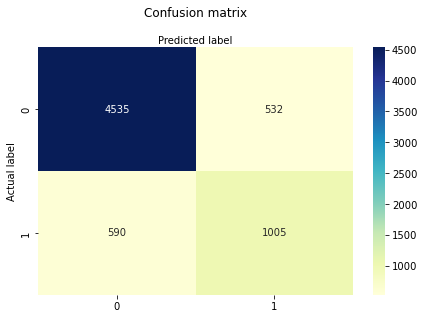

In [55]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = KNN.predict(X_test_sm_nc)
cf_matrix0 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc, y_pred_sm_nc))
print(accuracy_score(KNN.predict(X_train_sm_nc),y_train_sm_nc))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      5067
         1.0       0.81      0.77      0.79      1595

    accuracy                           0.90      6662
   macro avg       0.87      0.86      0.86      6662
weighted avg       0.90      0.90      0.90      6662

0.950270229695241


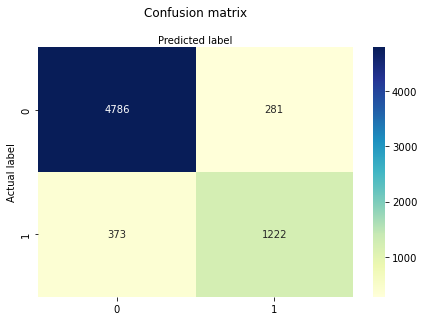

In [56]:
DCT = DecisionTreeClassifier()
DCT = DCT.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = DCT.predict(X_test_sm_nc)
cf_matrix0 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc, y_pred_sm_nc))
print(accuracy_score(DCT.predict(X_train_sm_nc),y_train_sm_nc))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      5067
         1.0       0.77      0.69      0.73      1595

    accuracy                           0.88      6662
   macro avg       0.84      0.81      0.83      6662
weighted avg       0.87      0.88      0.88      6662

0.950270229695241


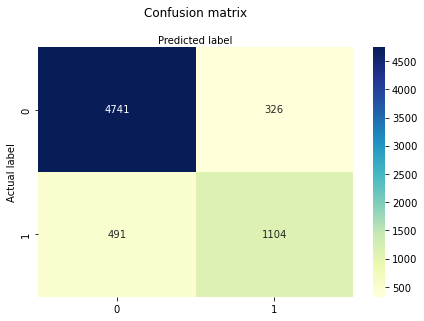

In [57]:
RDF = RandomForestClassifier()
RDF = RDF.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = RDF.predict(X_test_sm_nc)
cf_matrix0 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc, y_pred_sm_nc))
print(accuracy_score(RDF.predict(X_train_sm_nc),y_train_sm_nc))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      5067
         1.0       0.00      0.00      0.00      1595

    accuracy                           0.76      6662
   macro avg       0.38      0.50      0.43      6662
weighted avg       0.58      0.76      0.66      6662

0.7596081669419006


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


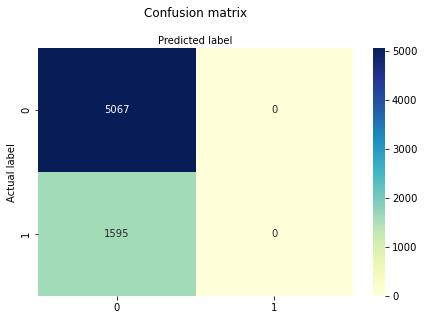

In [58]:
GNB = GaussianNB()
GNB = GNB.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = GNB.predict(X_test_sm_nc)
cf_matrix0 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc, y_pred_sm_nc))
print(accuracy_score(GNB.predict(X_train_sm_nc),y_train_sm_nc))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92      5067
         1.0       1.00      0.43      0.60      1595

    accuracy                           0.86      6662
   macro avg       0.92      0.72      0.76      6662
weighted avg       0.88      0.86      0.84      6662

0.8610568983636091


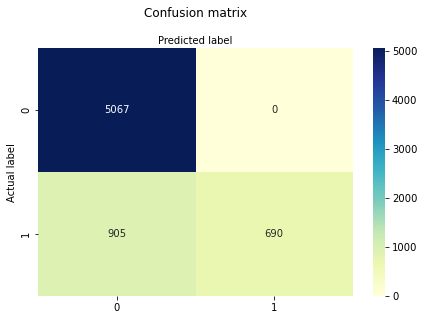

In [59]:
GB = GradientBoostingClassifier()
GB = GB.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = GB.predict(X_test_sm_nc)
cf_matrix0 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix0), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc, y_pred_sm_nc))
print(accuracy_score(GB.predict(X_train_sm_nc),y_train_sm_nc))

In [60]:
model_lr = LogisticRegression().fit(X_train_sm_nc, y_train_sm_nc)
probs_lr = model_lr.predict_proba(X_test_sm_nc)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train_sm_nc, y_train_sm_nc)
probs_dt = model_dt.predict_proba(X_test_sm_nc)[:, 1]

model_rf = RandomForestClassifier().fit(X_train_sm_nc, y_train_sm_nc)
probs_rf = model_rf.predict_proba(X_test_sm_nc)[:, 1]

model_knn = KNeighborsClassifier().fit(X_train_sm_nc, y_train_sm_nc)
probs_knn = model_knn.predict_proba(X_test_sm_nc)[:, 1]

model_nb = GaussianNB().fit(X_train_sm_nc, y_train_sm_nc)
probs_nb = model_nb.predict_proba(X_test_sm_nc)[:, 1]

model_gb = GradientBoostingClassifier().fit(X_train_sm_nc, y_train_sm_nc)
probs_gb = model_gb.predict_proba(X_test_sm_nc)[:, 1]

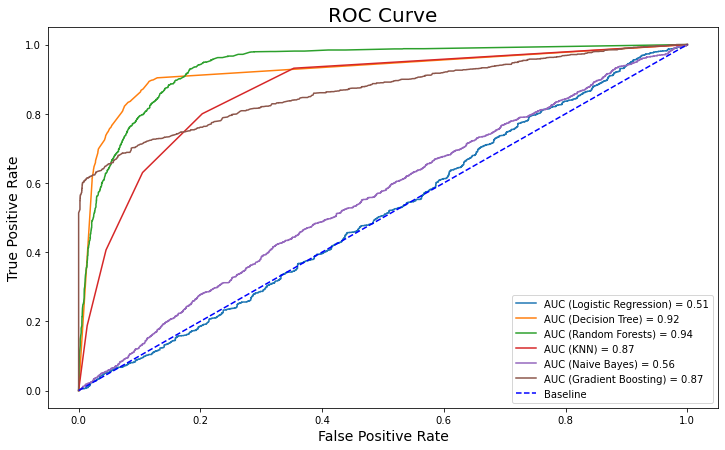

In [61]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc_lr = roc_auc_score(y_test_sm_nc, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_sm_nc, probs_lr)

auc_dt = roc_auc_score(y_test_sm_nc, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test_sm_nc, probs_dt)

auc_rf = roc_auc_score(y_test_sm_nc, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_sm_nc, probs_rf)

auc_knn = roc_auc_score(y_test_sm_nc, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_sm_nc, probs_knn)

auc_nb = roc_auc_score(y_test_sm_nc, probs_nb)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test_sm_nc, probs_nb)

auc_gb = roc_auc_score(y_test_sm_nc, probs_gb)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_sm_nc, probs_gb)



plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_nb, tpr_nb, label=f'AUC (Naive Bayes) = {auc_nb:.2f}')
plt.plot(fpr_gb, tpr_gb, label=f'AUC (Gradient Boosting) = {auc_gb:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()

In [107]:
#Gridsearch for RF 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import ParameterGrid
# Number of trees in random forest 
n_estimators = [50,100,200] # [50, 100, 200, 500] 
# Maximum number of levels in tree 
max_depth = [None, 5 , 10, 20] 
# max_depth.append(None) 
# Number of features to consider at every split 
max_features = [ 1, 3 , 'sqrt', 10 ] 

# Create the random grid 
random_grid1 = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth} 
rf = RandomForestClassifier() 
 
rf_random1 = GridSearchCV(estimator = rf, param_grid = random_grid1, scoring = 'accuracy')

In [108]:
list(ParameterGrid(random_grid1))

[{'max_depth': None, 'max_features': 1, 'n_estimators': 50},
 {'max_depth': None, 'max_features': 1, 'n_estimators': 100},
 {'max_depth': None, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': None, 'max_features': 3, 'n_estimators': 50},
 {'max_depth': None, 'max_features': 3, 'n_estimators': 100},
 {'max_depth': None, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50},
 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100},
 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200},
 {'max_depth': None, 'max_features': 10, 'n_estimators': 50},
 {'max_depth': None, 'max_features': 10, 'n_estimators': 100},
 {'max_depth': None, 'max_features': 10, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 50},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 100},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 3, 'n_estimators': 50},
 {'max_d

In [109]:
rf_grid_result = rf_random1.fit(X_train_sm_nc, y_train_sm_nc)

In [110]:
#Show best parameters
rf_grid_result.best_params_

{'max_depth': None, 'max_features': 10, 'n_estimators': 200}

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      5067
         1.0       0.84      0.82      0.83      1595

    accuracy                           0.92      6662
   macro avg       0.89      0.88      0.89      6662
weighted avg       0.92      0.92      0.92      6662

0.950270229695241


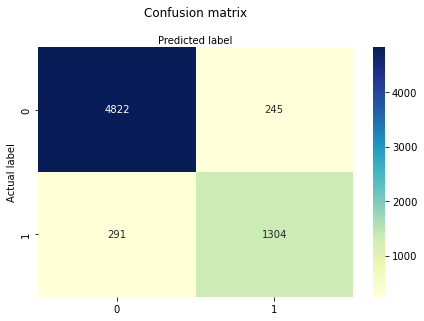

In [111]:
rf2 = RandomForestClassifier(max_depth = None, max_features = 10, n_estimators = 100)
rf2 = rf2.fit(X_train_sm_nc, y_train_sm_nc)
y_pred_sm_nc = rf2.predict(X_test_sm_nc)
print(metrics.classification_report(y_test_sm_nc,y_pred_sm_nc )) 
# use heat map to show confusion matrix
cf_matrix2 = metrics.confusion_matrix(y_test_sm_nc, y_pred_sm_nc)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(accuracy_score(y_train_sm_nc, rf2.predict(X_train_sm_nc)))

In [112]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=rf2, X=X_train_sm_nc, y=y_train_sm_nc, cv=10)

In [113]:
#Show all accuracies
print(all_accuracies)

[0.91369606 0.90881801 0.91294559 0.91557223 0.91403904 0.9024024
 0.91704204 0.91591592 0.91704204 0.90578078]


In [114]:
print(all_accuracies.mean())

0.9123254117156556


In [115]:
print(all_accuracies.std())

0.0047615832816270695


# Cancellation

## Model Training and Testing

In [116]:
data_cancellation = data[["Cancelled","Age", "Gender", "Salary", "Distance", "daily_cleaning_frequency", "Insurance"]]
data_cancellation

,Cancelled,Age,Gender,Salary,Distance,daily_cleaning_frequency,Insurance
0,0,21.0,0,20000,50,3,0
1,0,38.0,1,40000,5,1,1
2,0,32.0,1,40000,10,1,0
3,2,18.0,1,20000,5,3,0
4,3,25.0,1,60000,5,1,1
...,...,...,...,...,...,...,...
26308,0,30.0,0,80000,5,2,0
26309,0,55.0,0,40000,50,0,0
26310,0,36.0,1,60000,2,3,0
26311,0,43.0,0,100000,20,2,0


In [117]:
from sklearn.model_selection import train_test_split
X,y = data_cancellation.iloc[:,1:], data_cancellation['Cancelled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
y.value_counts()

0    24878
1      527
3      429
2      322
4      157
Name: Cancelled, dtype: int64

In [119]:
from imblearn.over_sampling import SMOTENC

oversample_cancellation = SMOTENC(categorical_features=[1,2,3,4,5]
               , random_state=123, sampling_strategy = {1:3000,2:2400,3:1800,4:600})
X_sm_nc_cancellation, y_sm_nc_cancellation = oversample_cancellation.fit_resample(X, y)

In [120]:
y_sm_nc_cancellation.value_counts()

0    24878
1     3000
2     2400
3     1800
4      600
Name: Cancelled, dtype: int64

In [121]:
X_sm_nc_cancellation.value_counts()

Age        Gender  Salary  Distance  daily_cleaning_frequency  Insurance
31.000000  1       60000   5         1                         1            26
28.000000  0       40000   5         1                         1            21
24.000000  1       20000   10        2                         1            21
           0       40000   10        2                         1            21
34.000000  0       20000   5         2                         1            19
                                                                            ..
27.695532  1       80000   5         1                         1             1
27.697704  1       20000   10        2                         1             1
27.699845  1       40000   10        2                         1             1
27.701604  1       60000   5         2                         0             1
63.000000  0       80000   50        2                         1             1
Length: 15881, dtype: int64

In [122]:
X_train_sm_nc_cancellation, X_test_sm_nc_cancellation, y_train_sm_nc_cancellation, y_test_sm_nc_cancellation = train_test_split(X_sm_nc_cancellation, y_sm_nc_cancellation, test_size=0.2, random_state=42)

## Logistic Regression Cancellation 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4959
           1       0.00      0.00      0.00       611
           2       0.00      0.00      0.00       502
           3       0.00      0.00      0.00       352
           4       0.00      0.00      0.00       112

    accuracy                           0.76      6536
   macro avg       0.15      0.20      0.17      6536
weighted avg       0.58      0.76      0.65      6536

0.7619539438451534


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


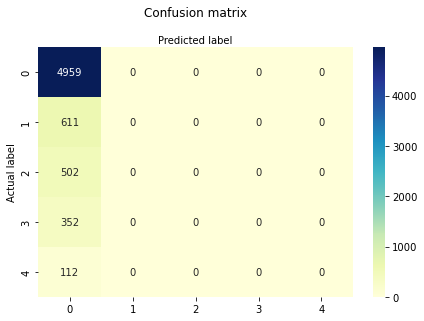

In [123]:
LR_cancellation = LogisticRegression()
LR_cancellation = LR_cancellation.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = LR_cancellation.predict(X_test_sm_nc_cancellation)
cf_matrix0_cancellation = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names_cancellation=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names_cancellation))
plt.xticks(tick_marks, class_names_cancellation)
plt.yticks(tick_marks, class_names_cancellation)
sns.heatmap(pd.DataFrame(cf_matrix0_cancellation), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation))
print(accuracy_score(LR.predict(X_train_sm_nc_cancellation),y_train_sm_nc_cancellation))

## KNN Cancellation

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4959
           1       0.55      0.38      0.45       611
           2       0.60      0.42      0.49       502
           3       0.42      0.22      0.29       352
           4       0.26      0.08      0.12       112

    accuracy                           0.78      6536
   macro avg       0.53      0.40      0.44      6536
weighted avg       0.75      0.78      0.76      6536

0.8362787850967791


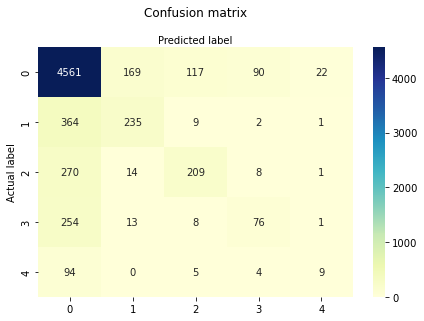

In [124]:
KNN_cancellation = KNeighborsClassifier()
KNN_cancellation = KNN_cancellation.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = KNN_cancellation.predict(X_test_sm_nc_cancellation)
cf_matrix0_cancellation = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names_cancellation=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names_cancellation))
plt.xticks(tick_marks, class_names_cancellation)
plt.yticks(tick_marks, class_names_cancellation)
sns.heatmap(pd.DataFrame(cf_matrix0_cancellation), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation))
print(accuracy_score(KNN_cancellation.predict(X_train_sm_nc_cancellation),y_train_sm_nc_cancellation))

## Decision Tree Cancellation

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4959
           1       0.29      0.49      0.36       611
           2       0.00      0.00      0.00       502
           3       0.00      0.00      0.00       352
           4       0.00      0.00      0.00       112

    accuracy                           0.76      6536
   macro avg       0.23      0.29      0.25      6536
weighted avg       0.67      0.76      0.71      6536

0.7712110779588401


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


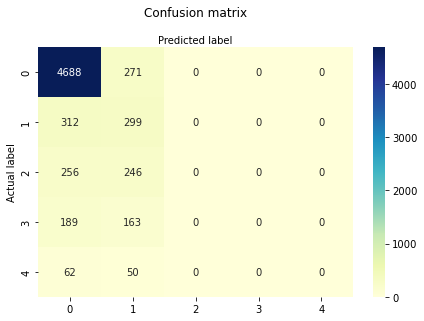

In [125]:
DCT_cancellation = DecisionTreeClassifier()
DCT_cancellation = DCT_cancellation.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = DCT.predict(X_test_sm_nc_cancellation)
cf_matrix0_cancellation = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names_cancellation=[0,1,2,3,4] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names_cancellation))
plt.xticks(tick_marks, class_names_cancellation)
plt.yticks(tick_marks, class_names_cancellation)
sns.heatmap(pd.DataFrame(cf_matrix0_cancellation), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation))
print(accuracy_score(DCT.predict(X_train_sm_nc_cancellation),y_train_sm_nc_cancellation))

## Random Forest

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      4959
           1       0.60      0.44      0.51       611
           2       0.65      0.49      0.56       502
           3       0.46      0.30      0.36       352
           4       0.37      0.18      0.24       112

    accuracy                           0.81      6536
   macro avg       0.59      0.47      0.51      6536
weighted avg       0.79      0.81      0.79      6536

0.7333792364776988


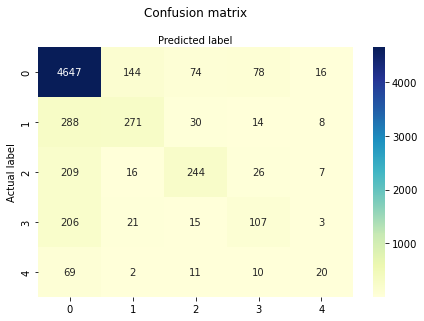

In [126]:
RDF_cancellation = RandomForestClassifier()
RDF_cancellation = RDF_cancellation.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = RDF_cancellation.predict(X_test_sm_nc_cancellation)
cf_matrix0_cancellation = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names_cancellation=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names_cancellation))
plt.xticks(tick_marks, class_names_cancellation)
plt.yticks(tick_marks, class_names_cancellation)
sns.heatmap(pd.DataFrame(cf_matrix0_cancellation), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation))
print(accuracy_score(RDF.predict(X_train_sm_nc_cancellation),y_train_sm_nc_cancellation))

## Gaussian Naive Bayes Cancellation

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      4959
           1       0.00      0.00      0.00       611
           2       0.00      0.00      0.00       502
           3       0.00      0.00      0.00       352
           4       0.00      0.00      0.00       112

    accuracy                           0.76      6536
   macro avg       0.15      0.20      0.17      6536
weighted avg       0.58      0.76      0.65      6536

0.7619539438451534


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


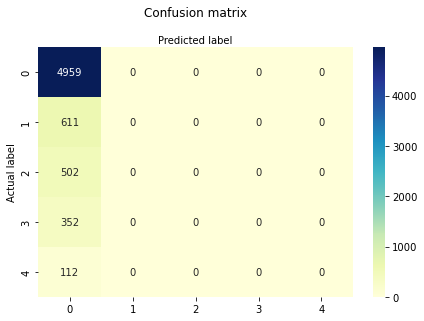

In [127]:
GNB_cancellation = GaussianNB()
GNB_cancellation = GNB_cancellation.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = GNB.predict(X_test_sm_nc_cancellation)
cf_matrix0_cancellation = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names_cancellation=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names_cancellation))
plt.xticks(tick_marks, class_names_cancellation)
plt.yticks(tick_marks, class_names_cancellation)
sns.heatmap(pd.DataFrame(cf_matrix0_cancellation), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation))
print(accuracy_score(GNB.predict(X_train_sm_nc_cancellation),y_train_sm_nc_cancellation))

## Gradient Boosting

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      4959
           1       0.38      0.42      0.40       611
           2       0.00      0.00      0.00       502
           3       0.00      0.00      0.00       352
           4       0.00      0.00      0.00       112

    accuracy                           0.80      6536
   macro avg       0.25      0.28      0.26      6536
weighted avg       0.68      0.80      0.73      6536

0.8001683115293398


/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/annhuang/miniforge3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


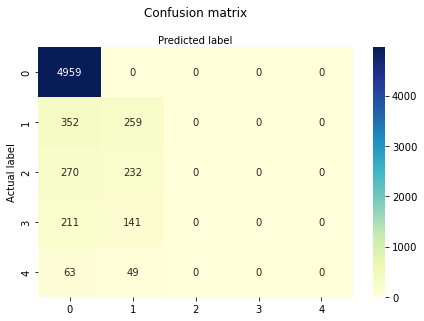

In [128]:
GB_cancellation = GradientBoostingClassifier()
GB_cancellation = GB_cancellation.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = GB.predict(X_test_sm_nc_cancellation)
cf_matrix0_cancellation = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names_cancellation=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names_cancellation))
plt.xticks(tick_marks, class_names_cancellation)
plt.yticks(tick_marks, class_names_cancellation)
sns.heatmap(pd.DataFrame(cf_matrix0_cancellation), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation))
print(accuracy_score(GB.predict(X_train_sm_nc_cancellation),y_train_sm_nc_cancellation))

In [131]:
#RF Gridsearch for cancellation 

# Number of trees in random forest 
n_estimators = [50,100,200] # [50, 100, 200, 500] 
# Maximum number of levels in tree 
max_depth = [None, 5 , 10, 20] 
# max_depth.append(None) 
# Number of features to consider at every split 
max_features = [ 1, 3 , 'sqrt', 10 ] 

# Create the random grid 
random_grid1_can = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth} 
rf_can = RandomForestClassifier() 
 
rf_random1_can = GridSearchCV(estimator = rf_can, param_grid = random_grid1_can, scoring = 'accuracy')

In [132]:
list(ParameterGrid(random_grid1_can))

[{'max_depth': None, 'max_features': 1, 'n_estimators': 50},
 {'max_depth': None, 'max_features': 1, 'n_estimators': 100},
 {'max_depth': None, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': None, 'max_features': 3, 'n_estimators': 50},
 {'max_depth': None, 'max_features': 3, 'n_estimators': 100},
 {'max_depth': None, 'max_features': 3, 'n_estimators': 200},
 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50},
 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100},
 {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200},
 {'max_depth': None, 'max_features': 10, 'n_estimators': 50},
 {'max_depth': None, 'max_features': 10, 'n_estimators': 100},
 {'max_depth': None, 'max_features': 10, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 50},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 100},
 {'max_depth': 5, 'max_features': 1, 'n_estimators': 200},
 {'max_depth': 5, 'max_features': 3, 'n_estimators': 50},
 {'max_d

In [140]:
rf_grid_result_can = rf_random1_can.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)

In [141]:
#Show best parameters
rf_grid_result_can.best_params_

{'max_depth': None, 'max_features': 10, 'n_estimators': 200}

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      4959
           1       0.66      0.48      0.56       611
           2       0.67      0.55      0.60       502
           3       0.53      0.35      0.42       352
           4       0.35      0.17      0.23       112

    accuracy                           0.84      6536
   macro avg       0.62      0.50      0.55      6536
weighted avg       0.82      0.84      0.82      6536

0.9446484584194017


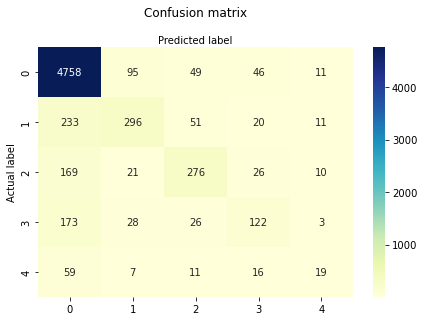

In [143]:
rf2_can = RandomForestClassifier(max_depth = None, max_features = 10, n_estimators = 200)
rf2_can = rf2_can.fit(X_train_sm_nc_cancellation, y_train_sm_nc_cancellation)
y_pred_sm_nc_cancellation = rf2_can.predict(X_test_sm_nc_cancellation)
print(metrics.classification_report(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)) 
# use heat map to show confusion matrix
cf_matrix2_can = metrics.confusion_matrix(y_test_sm_nc_cancellation, y_pred_sm_nc_cancellation)
class_names=[0,1] # name of classes
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cf_matrix2_can), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(accuracy_score(y_train_sm_nc_cancellation, rf2_can.predict(X_train_sm_nc_cancellation)))


In [144]:
all_accuracies_can = cross_val_score(estimator=rf2_can, X=X_train_sm_nc_cancellation, y=y_train_sm_nc_cancellation, cv=10)

In [169]:
#Show all accuracies
print(all_accuracies_can)

[0.82791587 0.83671128 0.8427697  0.83550115 0.83550115 0.82938026
 0.83205815 0.82325937 0.83435348 0.83511859]


In [170]:
print(all_accuracies_can.mean())

0.8332569002620103


In [171]:
print(all_accuracies_can.std())

0.00511967112216197
